In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Görselleştirme ayarları
plt.rcParams['font.family'] = 'Arial'
sns.set(style="whitegrid")

# VERİ YÜKLEME
file_path = r"C:\Users\Administrator\Downloads\e-ticaret_urun_yorumlari.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# VERİ ÖZETİ
print("Veri Bilgisi:")
print(df.info())
print("\nİlk 5 Satır:")
print(df.head())

# EKSİK DEĞER KONTROLÜ
print("\nEksik Değer Sayısı:")
print(df.isnull().sum())

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15170 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   15170 non-null  object
 1   Durum   15170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.2+ KB
None

İlk 5 Satır:
                                               Metin  Durum
0                              evet anlatıldığı gibi      1
1  Daha öncede almıştım bu cihazdan ense ve sakal...      1
2  Ürün gayet başarılı sakal kesmede başlık sayıs...      1
3  Daha öncede aynısını almıştım çok güzel ve kal...      1
4  Erkek kuaförüyüm ense ve sıfır sakal traşı içi...      1

Eksik Değer Sayısı:
Metin    0
Durum    0
dtype: int64


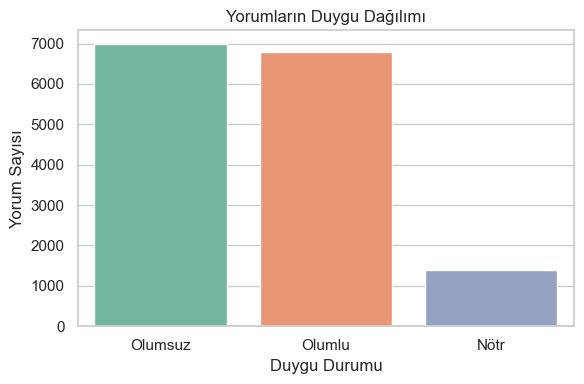

In [45]:
#"YORUM UZUNLUĞU" SÜTUNU EKLEME
df["yorum_uzunlugu"] = df["Metin"].astype(str).apply(len)

# DUYGU DAĞILIMI (Bar Grafiği)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Durum", hue="Durum", palette="Set2", legend=False)
plt.title("Yorumların Duygu Dağılımı")
plt.xlabel("Duygu Durumu")
plt.ylabel("Yorum Sayısı")
plt.xticks([0, 1, 2], ["Olumsuz", "Olumlu", "Nötr"])
plt.tight_layout()
plt.show()

In [46]:
#"YORUM UZUNLUĞU" İSTATİSTİKLERİ
print("\nYorum Uzunluğu İstatistikleri:")
print(df.groupby("Durum")["yorum_uzunlugu"].describe())


Yorum Uzunluğu İstatistikleri:
        count       mean        std   min   25%   50%    75%    max
Durum                                                              
0      6978.0  92.386214  76.272643   4.0  42.0  72.0  121.0  977.0
1      6799.0  64.272687  62.598700   5.0  26.0  45.0   80.0  948.0
2      1393.0  99.335966  85.773504  10.0  43.0  76.0  128.0  972.0


In [47]:
# ORTALAMA & MEDYAN UZUNLUKLAR
mean_lengths = df.groupby("Durum")["yorum_uzunlugu"].mean()
median_lengths = df.groupby("Durum")["yorum_uzunlugu"].median()
print("\nOrtalama Yorum Uzunlukları:\n", mean_lengths.round(2))
print("\nMedyan Yorum Uzunlukları:\n", median_lengths)


Ortalama Yorum Uzunlukları:
 Durum
0    92.39
1    64.27
2    99.34
Name: yorum_uzunlugu, dtype: float64

Medyan Yorum Uzunlukları:
 Durum
0    72.0
1    45.0
2    76.0
Name: yorum_uzunlugu, dtype: float64


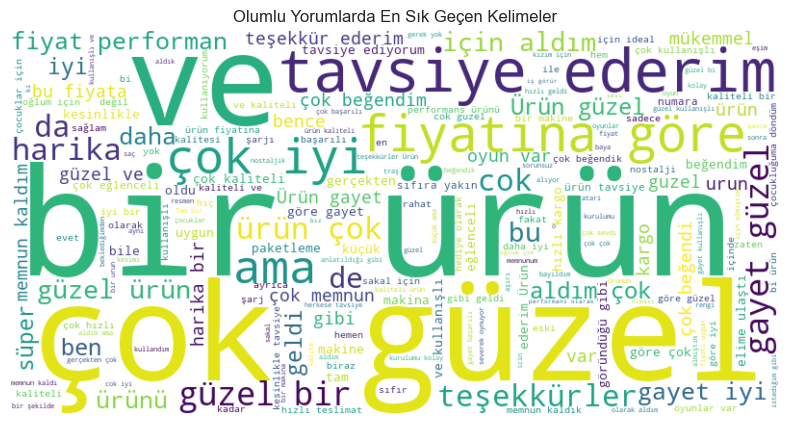

In [48]:
# WORDCLOUD – OLUMLU YORUMLAR
olumlu_yorumlar = " ".join(df[df["Durum"] == 1]["Metin"])
wordcloud_olumlu = WordCloud(width=800, height=400, background_color="white").generate(olumlu_yorumlar)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_olumlu, interpolation="bilinear")
plt.axis("off")
plt.title("Olumlu Yorumlarda En Sık Geçen Kelimeler")
plt.show()

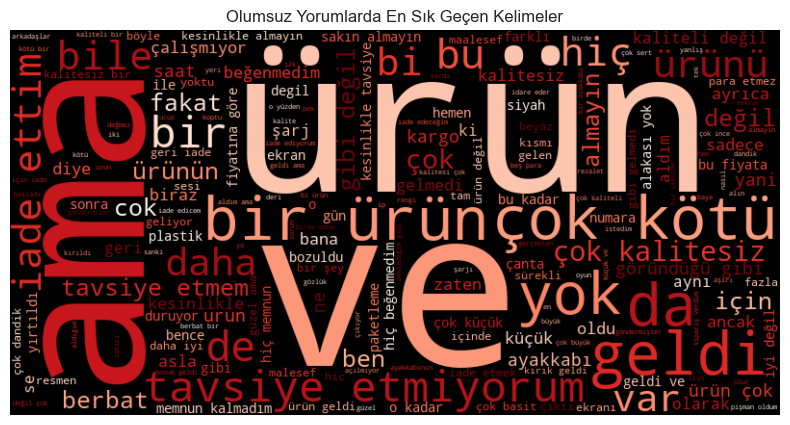

In [49]:
# WORDCLOUD – OLUMSUZ YORUMLAR
olumsuz_yorumlar = " ".join(df[df["Durum"] == 0]["Metin"])
wordcloud_olumsuz = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(olumsuz_yorumlar)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_olumsuz, interpolation="bilinear")
plt.axis("off")
plt.title("Olumsuz Yorumlarda En Sık Geçen Kelimeler")
plt.show()


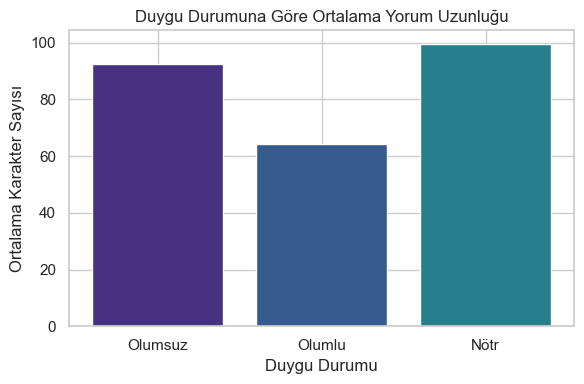

In [50]:
# DUYGUYA GÖRE ORTALAMA YORUM UZUNLUK GRAFİĞİ
# Etiketleri ve değerleri manuel belirleyerek çizim
plt.figure(figsize=(6, 4))
etiketler = ["Olumsuz", "Olumlu", "Nötr"]
plt.bar(etiketler, mean_lengths.values, color=sns.color_palette("viridis"))
plt.title("Duygu Durumuna Göre Ortalama Yorum Uzunluğu")
plt.ylabel("Ortalama Karakter Sayısı")
plt.xlabel("Duygu Durumu")
plt.tight_layout()
plt.show()


In [51]:
# Duygu dağılımı: kaç tane olumlu, olumsuz, nötr var?
sayi_tablosu = df["Durum"].value_counts().sort_index()
sayi_tablosu.index = ["Olumsuz (0)", "Olumlu (1)", "Nötr (2)"]

print("Yorum Sayıları (Duruma Göre):\n")
print(sayi_tablosu)

Yorum Sayıları (Duruma Göre):

Olumsuz (0)    6978
Olumlu (1)     6799
Nötr (2)       1393
Name: count, dtype: int64


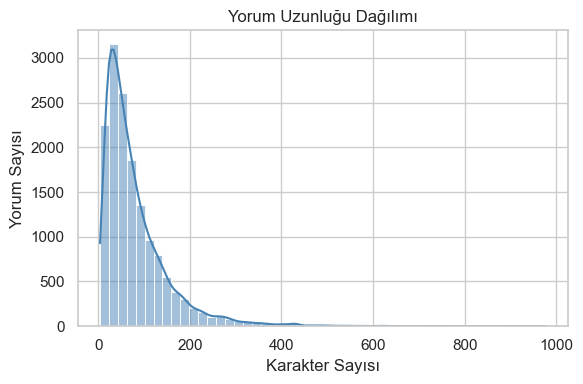

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(df["yorum_uzunlugu"], bins=50, kde=True, color="steelblue")
plt.title("Yorum Uzunluğu Dağılımı")
plt.xlabel("Karakter Sayısı")
plt.ylabel("Yorum Sayısı")
plt.tight_layout()
plt.show()



🔍 Accuracy: 0.8899143045484509

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1370
           1       0.91      0.94      0.92      1384
           2       0.66      0.41      0.51       280

    accuracy                           0.89      3034
   macro avg       0.82      0.76      0.78      3034
weighted avg       0.88      0.89      0.88      3034



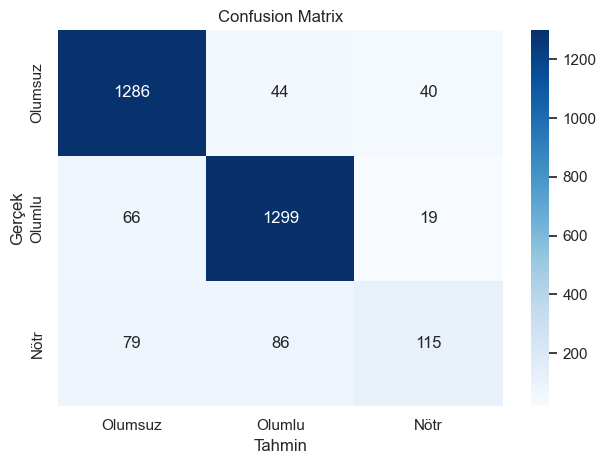

In [53]:
# Veri eğitim ve test olarak bölünüyor
X = df["Metin"].astype(str)
y = df["Durum"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Metin verisi TF-IDF ile dönüştürülüyor
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Lojistik regresyon modeli kurulup eğitiliyor
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Tahmin
y_pred = model.predict(X_test_vec)

# Test verisi üzerinde tahmin yapılıyor
print("\n🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Olumsuz", "Olumlu", "Nötr"], yticklabels=["Olumsuz", "Olumlu", "Nötr"])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()